## Distribution Gaussienne: principes

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.special import comb
from scipy.stats import binom
from scipy.stats import norm

# Exercice 7

In [9]:
N = 10
p = 0.5
q = 1-p

In [11]:
data_df = pd.DataFrame()

data_df['X'] = range(0,N+1)
data_df['p**X'] = p**data_df['X']
data_df['q**(N-X)'] = q**(N-data_df['X'])
data_df['fac'] = comb(N,data_df['X'])
data_df['prob'] = data_df['fac'] * data_df['p**X'] * data_df['q**(N-X)']
data_df['scipy.stats.binom'] = data_df['X'].apply(lambda x:binom.pmf(x,N,p))

In [12]:
data_df

,X,p**X,q**(N-X),fac,prob,scipy.stats.binom
0,0,1.000000,0.000977,1.0,0.000977,0.000977
1,1,0.500000,0.001953,10.0,0.009766,0.009766
2,2,0.250000,0.003906,45.0,0.043945,0.043945
3,3,0.125000,0.007812,120.0,0.117188,0.117188
4,4,0.062500,0.015625,210.0,0.205078,0.205078
5,5,0.031250,0.031250,252.0,0.246094,0.246094
6,6,0.015625,0.062500,210.0,0.205078,0.205078
7,7,0.007812,0.125000,120.0,0.117188,0.117187
8,8,0.003906,0.250000,45.0,0.043945,0.043945
9,9,0.001953,0.500000,10.0,0.009766,0.009766


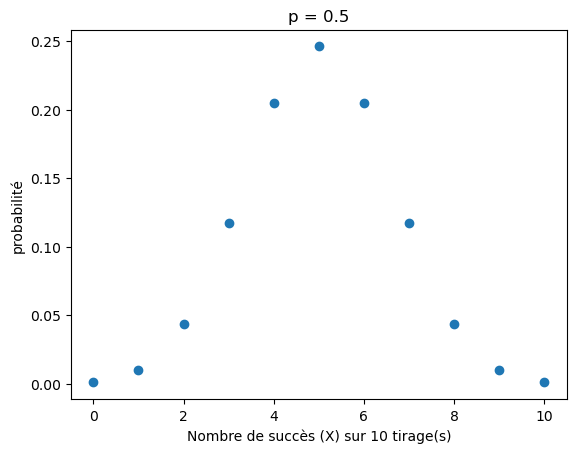

In [13]:
plt.plot(data_df['X'],data_df['prob'],'o')
plt.xlabel('Nombre de succès (X) sur {} tirage(s)'.format(N))
plt.ylabel('probabilité')
plt.title('p = {}'.format(p))
plt.show()

In [14]:
data_df[(data_df['X']<=6)&(data_df['X']>=3)]

,X,p**X,q**(N-X),fac,prob,scipy.stats.binom
3,3,0.125000,0.007812,120.0,0.117188,0.117188
4,4,0.062500,0.015625,210.0,0.205078,0.205078
5,5,0.031250,0.031250,252.0,0.246094,0.246094
6,6,0.015625,0.062500,210.0,0.205078,0.205078


In [15]:
data_df[(data_df['X']<=6)&(data_df['X']>=3)]['prob'].sum()

0.7734375

In [16]:
#
# Approximation par une gaussienne: OK on est bien dans les conditions puisque 
# p ET q sont bien éloignés de 0 (=0.5 tous les deux!!!)
#

In [17]:
gauss_df = pd.DataFrame()

gauss_df['X'] = range(0,N*100+1)
gauss_df['X'] = gauss_df['X']/100
gauss_df['prob density'] = norm.pdf(gauss_df['X'],loc=N*p,scale=math.sqrt(N*p*q))
gauss_df

,X,prob density
0,0.00,0.001700
1,0.01,0.001734
2,0.02,0.001769
3,0.03,0.001805
4,0.04,0.001841
...,...,...
996,9.96,0.001841
997,9.97,0.001805
998,9.98,0.001769
999,9.99,0.001734


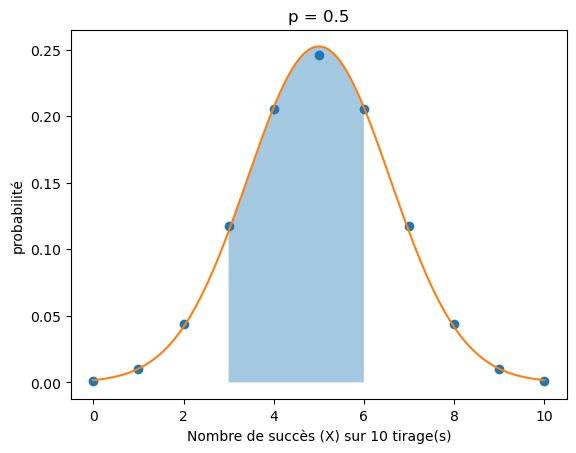

In [18]:
plt.plot(data_df['X'],data_df['prob'],'o')
plt.plot(gauss_df['X'],gauss_df['prob density'])
select_df = gauss_df[(gauss_df['X']>=3)&(gauss_df['X']<=6)]
plt.fill_between(select_df['X'], select_df['prob density'], alpha=0.4)

plt.xlabel('Nombre de succès (X) sur {} tirage(s)'.format(N))
plt.ylabel('probabilité')
plt.title('p = {}'.format(p))
plt.show()

In [19]:
(norm.cdf(6,loc=N*p,scale=math.sqrt(N*p*q))-norm.cdf(3,loc=N*p,scale=math.sqrt(N*p*q)))

0.6335037662011967

In [20]:
#
# On a dit que c une 'bonne' approximation...
#
# Même si la courbe continue (approximation continue = courbe gaussienne)
# passe pratiquement par tous les points (distribution discrète)... attention
# que ce n'est qu'une approximation!!!
#